![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (18, 6)})
pd.options.display.float_format = '{:,.0f}'.format

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [3]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [4]:
df.HouseholdStatus.value_counts()

Rent                        3666
Own                         3255
Live with Parents/Family    1813
?                            240
Live with Family               6
Rental                         4
Live with Fam                  3
Live with Parents              3
Name: HouseholdStatus, dtype: int64

In [5]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [6]:
# Your code goes here
df.loc[df.Sex=='Male','Sex']='1'
df.loc[df['HouseholdStatus'].str.match('Own')==True,'HouseholdStatus']=1
df.loc[df['HouseholdStatus'].str.match('Rent')==True,'HouseholdStatus']=2
df.loc[df['HouseholdStatus'].str.match('Live')==True,'HouseholdStatus']=3
df=df.replace('?',np.NaN)
df[['Sex', 'MaritalStatus', 'Age', 'Education', 'Occupation', 'YearsInSf',
       'DualIncome', 'HouseholdMembers', 'Under18',
       'TypeOfHome', 'EthnicClass', 'Language']] = df[['Sex', 'MaritalStatus', 'Age', 'Education', 'Occupation', 'YearsInSf',
       'DualIncome', 'HouseholdMembers', 'Under18', 
       'TypeOfHome', 'EthnicClass', 'Language']].apply(pd.to_numeric)
df['AnualIncome']=df['AnualIncome'].astype(float)
df.loc[df.Sex.isin(np.arange(1,3))==False,'Sex']=np.NaN
df.loc[df.MaritalStatus.isin(np.arange(1,6))==False,'MaritalStatus']=np.NaN
df.loc[df.Age.isin(np.arange(1,8))==False,'Age']=np.NaN
df.loc[df.Education.isin(np.arange(1,7))==False,'Education']=np.NaN
df.loc[df.Occupation.isin(np.arange(1,10))==False,'Occupation']=np.NaN
df.loc[df.YearsInSf.isin(np.arange(1,7))==False,'YearsInSf']=np.NaN
df.loc[df.HouseholdMembers.isin(np.arange(1,10))==False,'HouseholdMembers']=np.NaN
df.loc[df.TypeOfHome.isin(np.arange(1,6))==False,'TypeOfHome']=np.NaN
df.loc[df.EthnicClass.isin(np.arange(1,9))==False,'EthnicClass']=np.NaN
df.loc[df.Language.isin(np.arange(1,4))==False,'Language']=np.NaN

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [16]:
df.HouseholdStatus.value_counts()

2    2872
1    2567
3    1406
Name: HouseholdStatus, dtype: int64

In [15]:
df=df.dropna()

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [17]:
# Your code goes here
df.describe()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
count,"6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845","6,845"
mean,2,3,3,4,4,4,2,3,1,2,2,6,1,"13,294,411,524"
std,0,2,2,1,3,1,1,2,1,1,1,2,0,"1,099,903,707,416"
min,1,1,1,1,1,1,1,1,0,1,1,1,1,7
25%,1,1,2,3,1,4,1,2,0,1,1,5,1,"11,703"
50%,2,3,3,4,3,5,1,3,0,2,1,7,1,"32,171"
75%,2,5,4,5,6,5,2,4,1,2,3,7,1,"66,994"
max,2,5,7,6,9,5,3,9,9,3,5,8,3,"91,000,000,000,036"


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

{'boxes': [<matplotlib.lines.Line2D at 0x7ff627c55b38>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff627c67630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff627c71390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff627c67ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff627c55cc0>,
  <matplotlib.lines.Line2D at 0x7ff627c671d0>]}

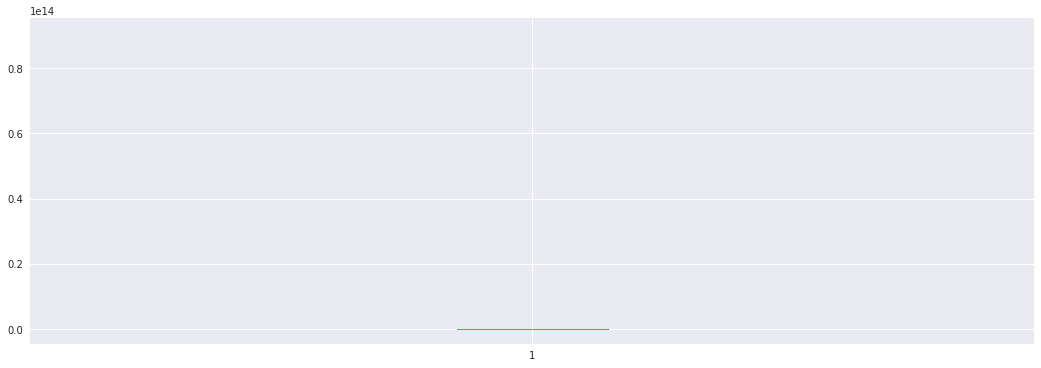

In [18]:
# Your code goes here
plt.boxplot(df.AnualIncome)


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [19]:
df['AnualIncome'].value_counts()

9,136                 1246
66,994                1065
32,171                 844
46,894                 781
76,004                 736
21,672                 613
11,703                 523
27,591                 523
19,997                 503
9,460                    1
460                      1
34,000                   1
91,000,000,000,036       1
150,500                  1
2,460                    1
5,740                    1
75,500                   1
7,540                    1
253,600                  1
7                        1
Name: AnualIncome, dtype: int64

In [20]:
df=df.loc[df.AnualIncome<100000]

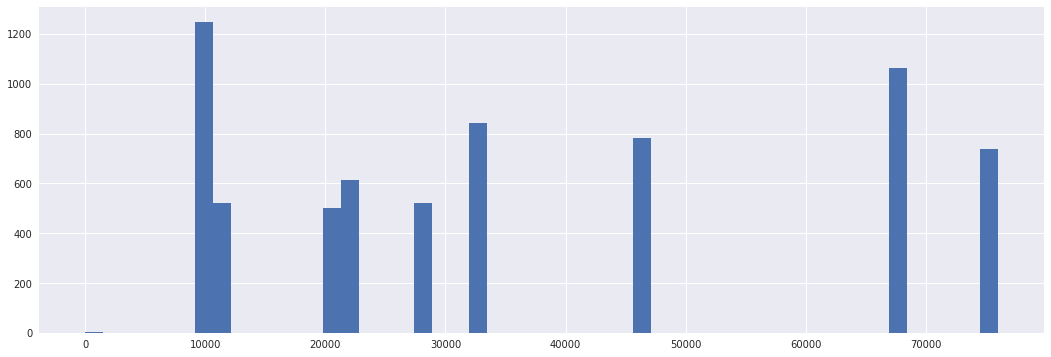

In [21]:
df['AnualIncome'].hist(bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff627af7f60>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff627b01a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff627b097b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff627b09358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff627b01128>,
  <matplotlib.lines.Line2D at 0x7ff627b015f8>]}

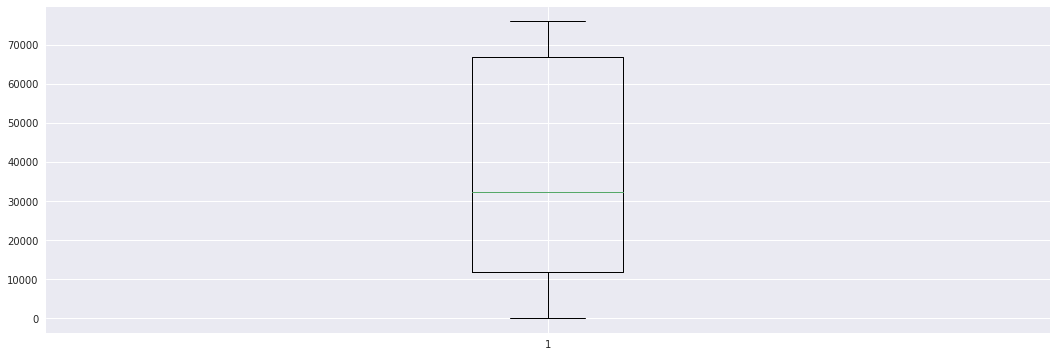

In [22]:
# Your code goes here
plt.boxplot(df.AnualIncome)


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

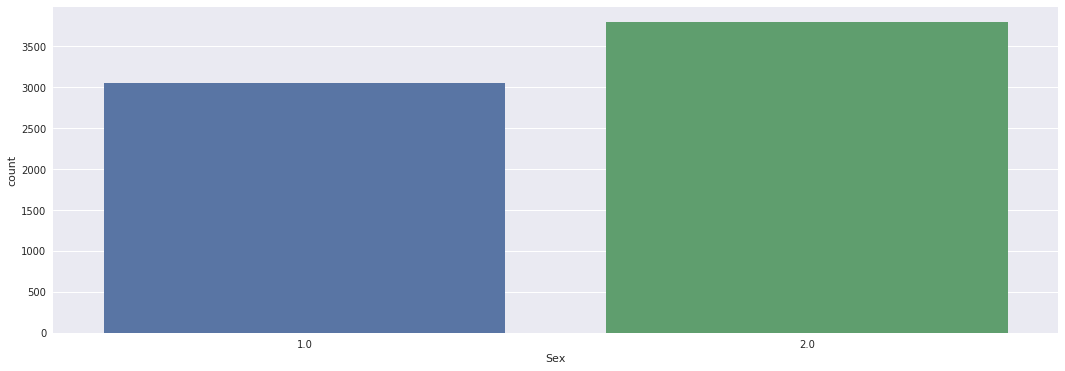

In [23]:
# Your code goes here
sns.countplot(x=df.Sex, data=pd.melt(df))


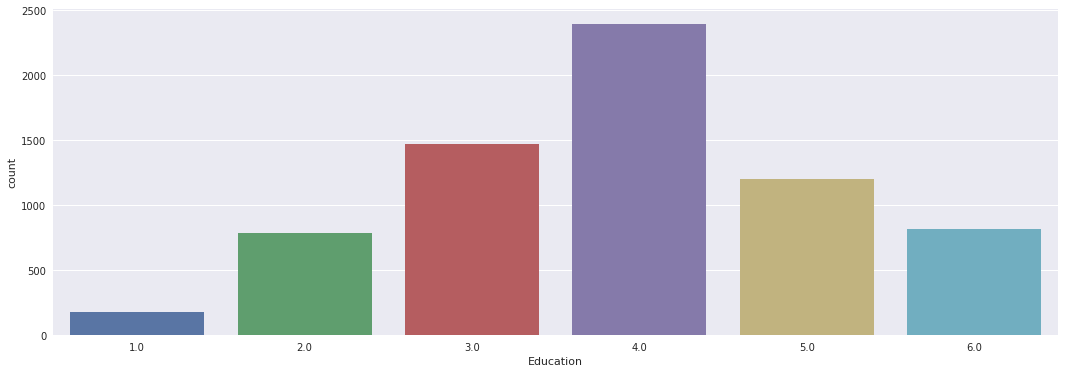

In [24]:
# Your code goes here
sns.countplot(x=df.Education, data=pd.melt(df))


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [25]:
# Your code goes here
df[['Sex','HouseholdStatus']].head(20)


,Sex,HouseholdStatus
2,1,1
3,2,2
4,2,3
5,2,3
6,1,1
7,1,2
8,1,2
9,1,2
10,1,2
11,1,2


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [26]:
# Your code goes here
df['MaritalStatus'][247]


1.0

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [27]:
# Your code goes here
len(df.loc[df.Sex==1])


3049

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [28]:
# Your code goes here
len(df.loc[df.HouseholdStatus==3])


1404

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [36]:
# Your code goes here
df['EthnicClass'].value_counts()


7    4577
5     870
3     630
2     379
8     175
1     111
6      88
4      12
Name: EthnicClass, dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [47]:
# parse AnualIncome as int
#df['AnualIncome'] = df['AnualIncome'].apply(int)

# Your code goes here

df.groupby('Occupation')['Occupation','AnualIncome'].sum().sort_values(by='AnualIncome', ascending=False)

,Occupation,AnualIncome
Occupation,,
1,"2,320","112,422,062"
4,"3,320","26,058,933"
6,"6,738","22,635,572"
5,"2,520","20,808,179"
2,"1,228","20,156,323"
8,"3,888","17,567,999"
3,"1,758","17,262,711"
9,"2,151","5,489,970"
7,980,"4,075,155"


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)